In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\Bloodhound\Downloads\Github\DataScience-AI-ML\Bostonhousing\BostonHousing.csv")
print(df.to_string())

         crim     zn  indus  chas     nox     rm    age      dis  rad  tax  ptratio       b  lstat  medv
0     0.00632   18.0   2.31     0  0.5380  6.575   65.2   4.0900    1  296     15.3  396.90   4.98  24.0
1     0.02731    0.0   7.07     0  0.4690  6.421   78.9   4.9671    2  242     17.8  396.90   9.14  21.6
2     0.02729    0.0   7.07     0  0.4690  7.185   61.1   4.9671    2  242     17.8  392.83   4.03  34.7
3     0.03237    0.0   2.18     0  0.4580  6.998   45.8   6.0622    3  222     18.7  394.63   2.94  33.4
4     0.06905    0.0   2.18     0  0.4580  7.147   54.2   6.0622    3  222     18.7  396.90   5.33  36.2
5     0.02985    0.0   2.18     0  0.4580  6.430   58.7   6.0622    3  222     18.7  394.12   5.21  28.7
6     0.08829   12.5   7.87     0  0.5240  6.012   66.6   5.5605    5  311     15.2  395.60  12.43  22.9
7     0.14455   12.5   7.87     0  0.5240  6.172   96.1   5.9505    5  311     15.2  396.90  19.15  27.1
8     0.21124   12.5   7.87     0  0.5240  5.631  100.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
df['rm'].fillna(df['rm'].mean(), inplace=True)

C:\Users\Bloodhound\AppData\Local\Temp\ipykernel_14588\3418382971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rm'].fillna(df['rm'].mean(), inplace=True)


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702085,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


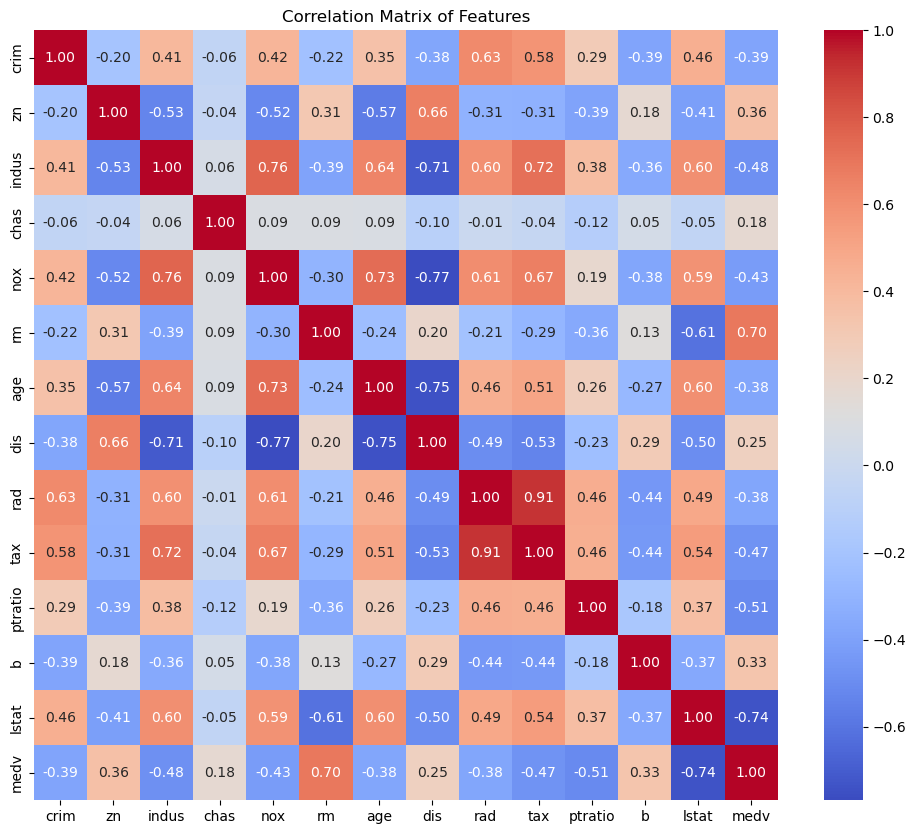

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [8]:
#Train-Test Split

X = df.drop('tax', axis=1)
y = df['tax']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (404, 13)
Testing data shape: (102, 13)


In [15]:
#Model Building
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [18]:
#Performance Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 3507.2495380417135
Root Mean Squared Error (RMSE): 59.22203591604829
Mean Absolute Error (MAE): 35.42793624155787
R-squared (R2): 0.8875311090308049


In [19]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

results_df.to_csv('prediction_results.csv', index=False)